In [1]:
import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

train_data =pd.read_csv('/Users/kashafali/Documents/Duke/IDS703-NLP/Project/NLP_FinalProject/00_source_data/cleaned_train.csv')
test_data =pd.read_csv('/Users/kashafali/Documents/Duke/IDS703-NLP/Project/NLP_FinalProject/00_source_data/cleaned_test.csv')


In [3]:
train_data.head()

,party,labels,text_new
0,Democrat,1,"['happi', 'birthday', 'strength', 'dedic', 'sk..."
1,Democrat,1,"['greatest', 'gener', 'invest', 'infrastructur..."
2,Republican,0,"['thank', 'infrastructur', 'invest', 'job', 'a..."
3,Democrat,1,"['get', 'last', 'chang', 'cant', 'lock', 'conv..."
4,Republican,0,"['today', 'celebr', 'year', 'hoosier', 'state'..."


In [4]:
train = train_data[['text_new','labels']]
test = test_data[['text_new','labels']]

In [5]:
combine=train.append(test,ignore_index=True) #train and test dataset are combined
combine.shape

/var/folders/2s/c87gg64118ndg_yrky9zvlnc0000gn/T/ipykernel_24883/1782420178.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine=train.append(test,ignore_index=True) #train and test dataset are combined


(99693, 2)

#train

In [6]:
combine.head()

,text_new,labels
0,"['happi', 'birthday', 'strength', 'dedic', 'sk...",1
1,"['greatest', 'gener', 'invest', 'infrastructur...",1
2,"['thank', 'infrastructur', 'invest', 'job', 'a...",0
3,"['get', 'last', 'chang', 'cant', 'lock', 'conv...",1
4,"['today', 'celebr', 'year', 'hoosier', 'state'...",0


In [7]:
# don't have lists in train text_new
combine['text_new'] = combine['text_new'].apply(lambda x: x.replace('[',''))
combine['text_new'] = combine['text_new'].apply(lambda x: x.replace(']',''))
combine['text_new'] = combine['text_new'].apply(lambda x: x.replace("'",''))
combine['text_new'] = combine['text_new'].apply(lambda x: x.replace(",",''))

In [8]:
combine.head()

,text_new,labels
0,happi birthday strength dedic skill sailor inc...,1
1,greatest gener invest infrastructur made envi ...,1
2,thank infrastructur invest job act author inte...,0
3,get last chang cant lock convict crime must al...,1
4,today celebr year hoosier state happi birthday...,0


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim 

In [10]:
text = combine['text_new']
model = CountVectorizer(ngram_range = (2, 2), max_df=0.90 ,min_df=2, stop_words='english')
matrix = model.fit_transform(text).toarray()
df_output = pd.DataFrame(data = matrix, columns = model.get_feature_names())
df_output.T.tail(5)

/Users/kashafali/opt/miniconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,99683,99684,99685,99686,99687,99688,99689,99690,99691,99692
zone tour,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zone vital,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zoom convers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zoom read,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zuckerberg facebook,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:

bow_vectorizer = CountVectorizer(ngram_range = (2, 2), max_df=0.90 ,min_df=2 , stop_words='english')
bow = bow_vectorizer.fit_transform(combine['text_new'])

In [12]:
combine=combine.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, combine['labels'],
                                                    test_size=0.2, random_state=69)

In [13]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (79754, 181518)
X_test_shape :  (19939, 181518)
y_train_shape :  (79754,)
y_test_shape :  (19939,)


In [14]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

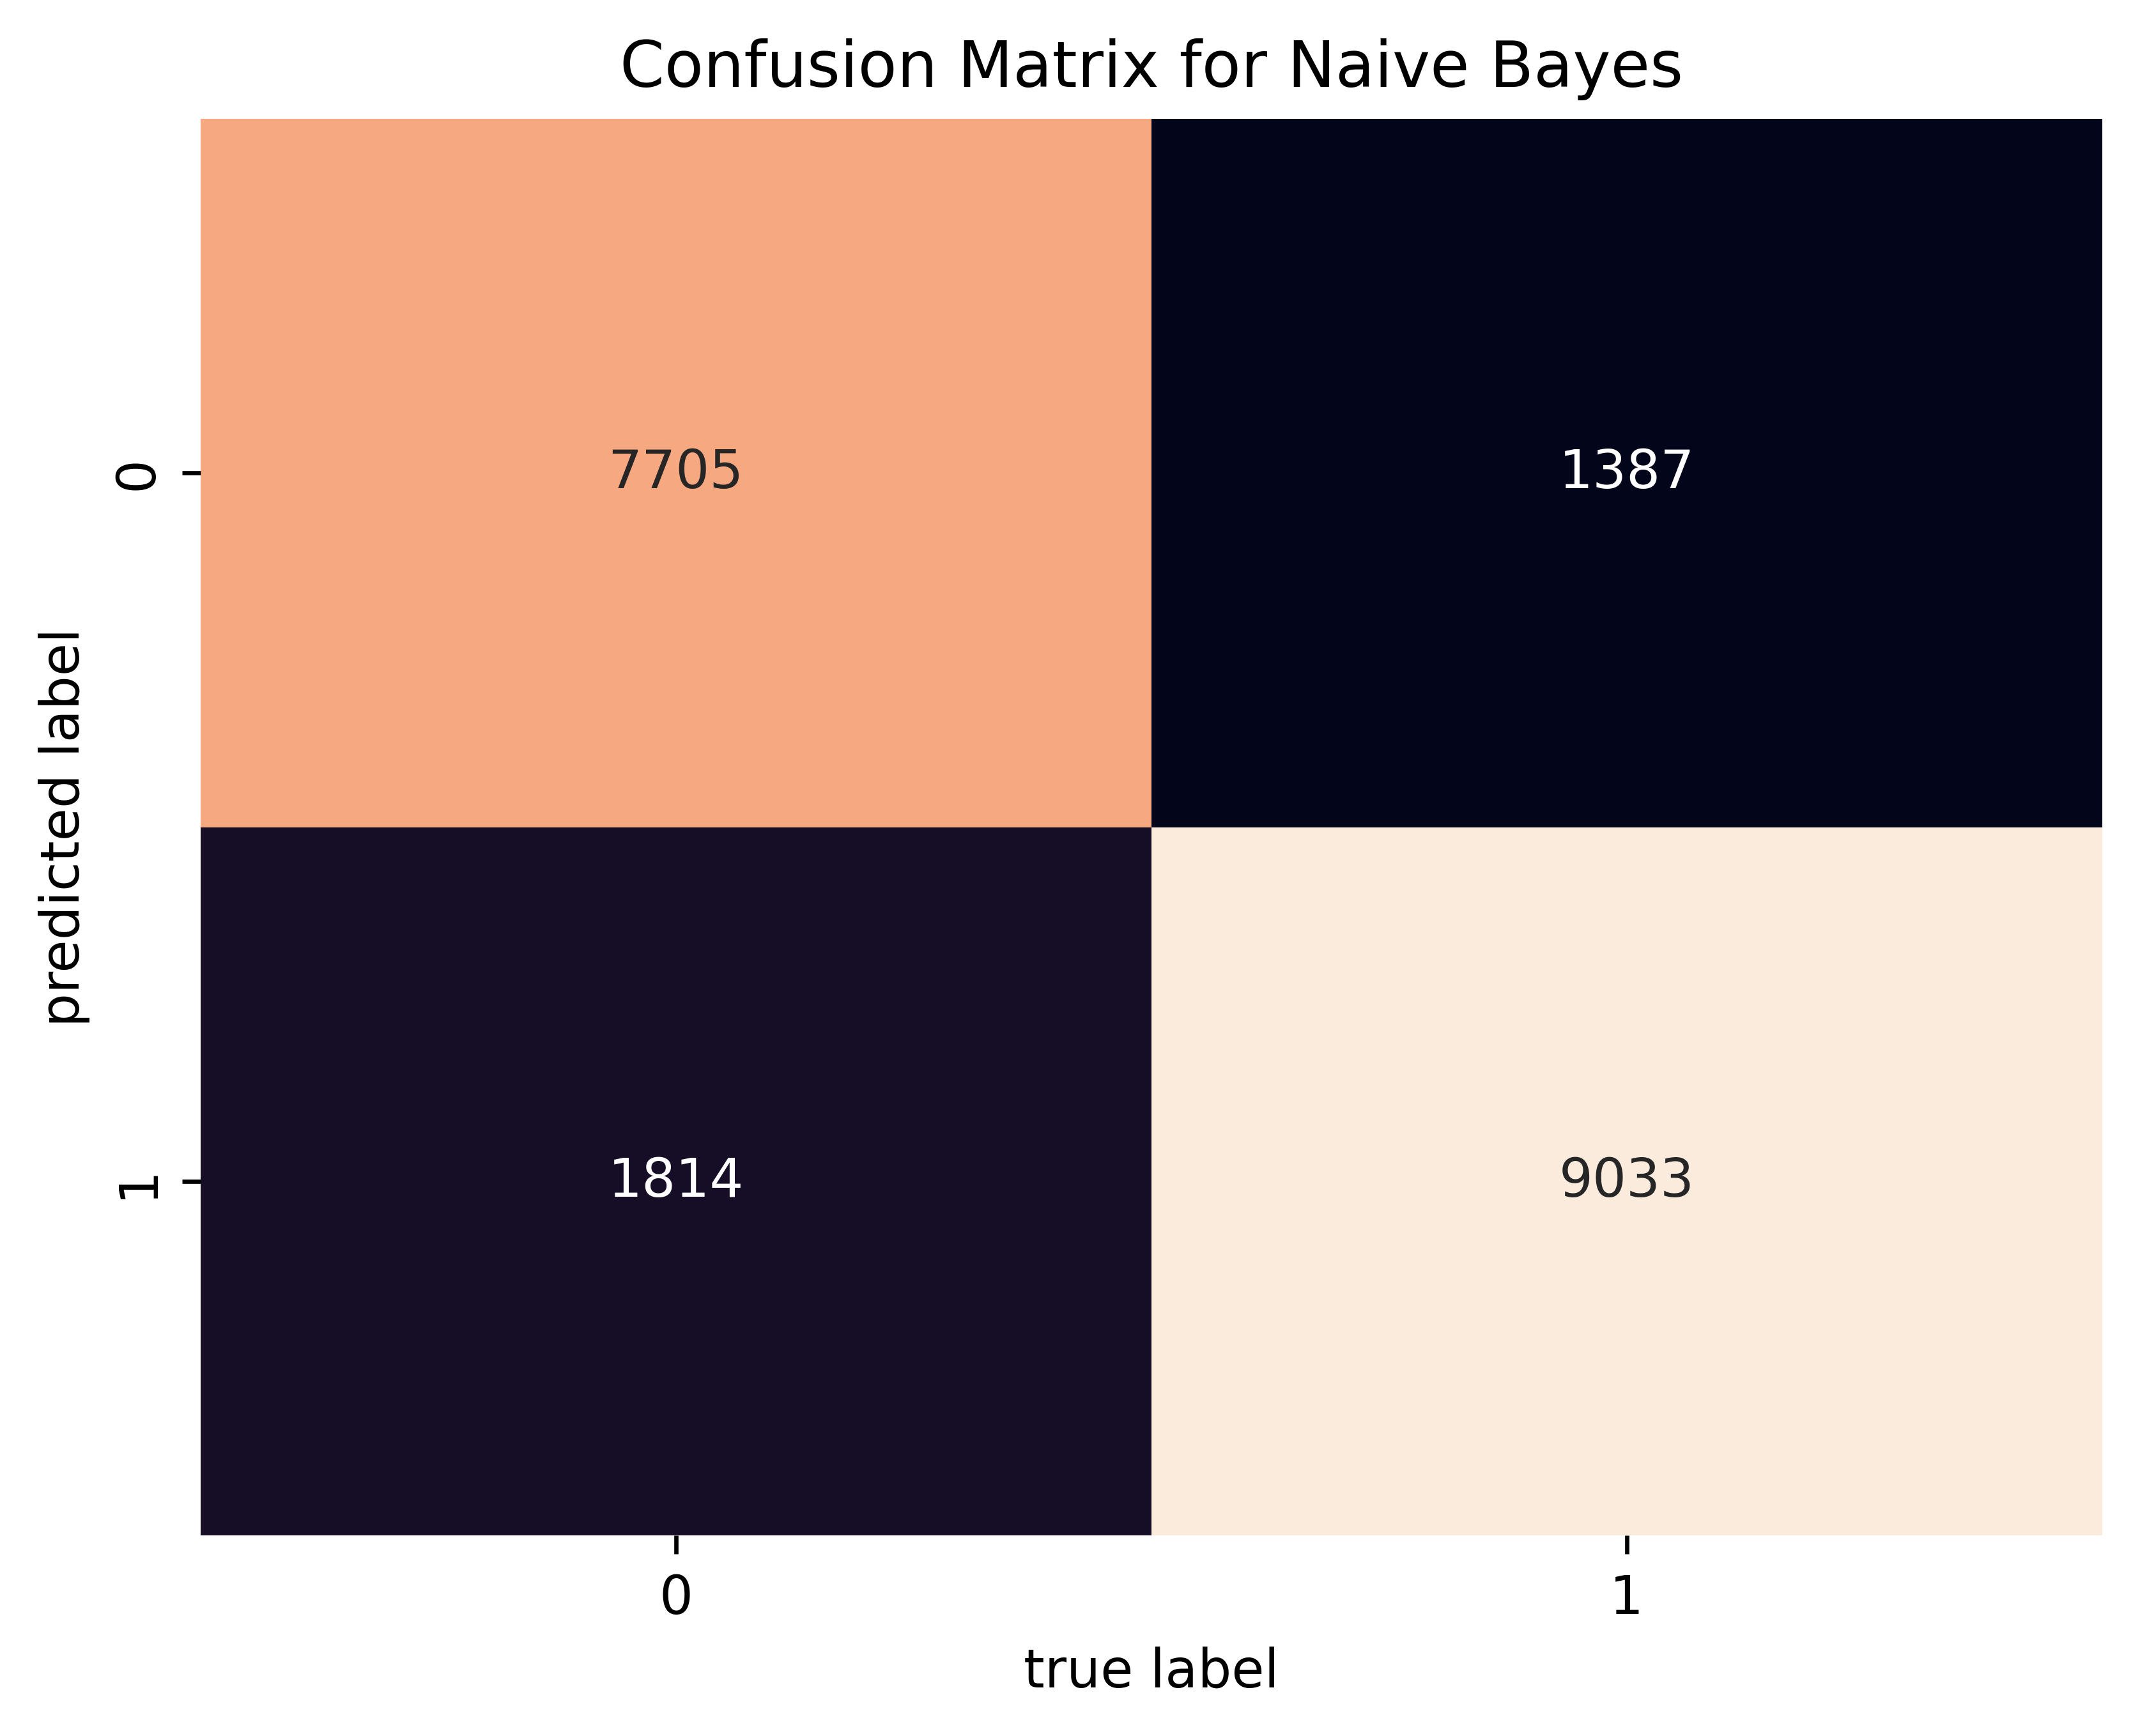

In [15]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [16]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.8394603540799438


In [17]:
#define y_true, y_pred
y_true = y_test
y_pred = predicted_naive

In [18]:
# calculate f1 score
from sklearn.metrics import f1_score
f1_score_naive = f1_score(y_true, y_pred, average='weighted')
print("F1 score with Naive-bayes: ",f1_score_naive)

F1 score with Naive-bayes:  0.8392303517101952


In [19]:
# calculate area under curve
from sklearn.metrics import roc_auc_score
auc_naive = roc_auc_score(y_true, y_pred)
print("AUC with Naive-bayes: ",auc_naive)


AUC with Naive-bayes:  0.8381621795302213
